In [4]:
slew = 7e-12  # 100p
cslew = 12e-12  # 100p
tunit = 100e-12  # 100p
tsetup = -2000e-12  # 100p
thold = 1000e-12  # 100p
tranmag = 1

# Calculate derived parameters
_tclk6_wait = -0.5 * cslew + 0.5 * slew - tsetup
_tclk1 = 50e-9  # 50n
_tclk2 = _tclk1 + cslew
_tclk3 = _tclk2 + 50e-9  # 50n
_tclk4 = _tclk3 + cslew
_tclk5 = _tclk4 + 50e-9  # 50n
_tclk6 = _tclk5 + _tclk6_wait
_tclk7 = _tclk6 + cslew
_tstart1 = _tclk6 + 0.5 * cslew - 0.5 * slew + tsetup
_tstart2 = _tstart1 + slew
_tend1 = _tclk6 + 0.5 * cslew - 0.5 * slew + thold
_tend2 = _tend1 + slew
_tsimend = _tclk7 + 50e-9  # 50n

# Create a dictionary with the results
results = {
    "_tclk6_wait": _tclk6_wait,
    "_tclk1": _tclk1,
    "_tclk2": _tclk2,
    "_tclk3": _tclk3,
    "_tclk4": _tclk4,
    "_tclk5": _tclk5,
    "_tclk6": _tclk6,
    "_tclk7": _tclk7,
    "_tstart1": _tstart1,
    "_tstart2": _tstart2,
    "_tend1": _tend1,
    "_tend2": _tend2,
    "_tsimend": _tsimend
}

results

{'_tclk6_wait': 1.9975e-09,
 '_tclk1': 5e-08,
 '_tclk2': 5.0012e-08,
 '_tclk3': 1.00012e-07,
 '_tclk4': 1.00024e-07,
 '_tclk5': 1.50024e-07,
 '_tclk6': 1.520215e-07,
 '_tclk7': 1.5203349999999998e-07,
 '_tstart1': 1.5002400000000002e-07,
 '_tstart2': 1.5003100000000003e-07,
 '_tend1': 1.53024e-07,
 '_tend2': 1.5303100000000002e-07,
 '_tsimend': 2.0203349999999998e-07}

In [ ]:
{'_tclk6_wait': 1.9975e-09,
 '_tclk1': 5e-08,
 '_tclk2': 5.0012e-08,
 '_tclk3': 1.00012e-07,
 '_tclk4': 1.00024e-07,
 '_tclk5': 1.50024e-07,
 '_tclk6': 1.520215e-07,
 '_tclk7': 1.5203349999999998e-07,
 '_tstart1': 1.5002400000000002e-07,
 '_tstart2': 1.5003100000000003e-07,
 '_tend1': 1.53024e-07,
 '_tend2': 1.5303100000000002e-07,
 '_tsimend': 2.0203349999999998e-07}

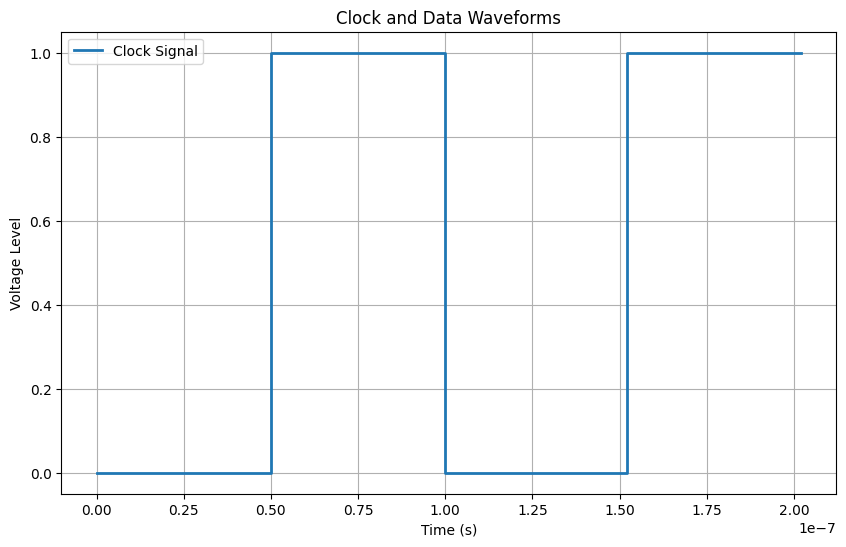

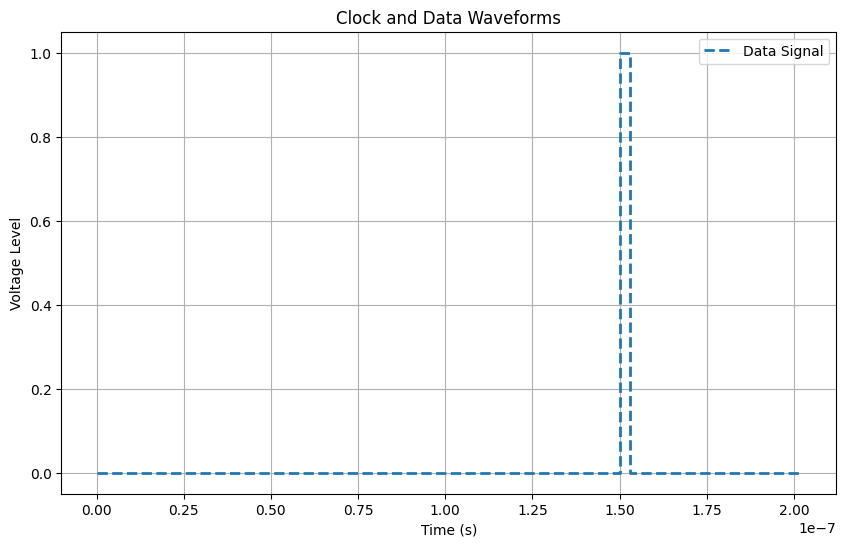

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define time points
time_points_clk = np.array([
    0,
    _tclk1,
    _tclk2,
    _tclk3,
    _tclk4,
    _tclk6,
    _tclk7,
    _tsimend
])

time_points_data = np.array([
    0,
    _tstart1,
    _tstart2,
    _tend1,
    _tend2,
    _tsimend
])

# Clock signal (simplified as a square wave)
clock_signal = np.array([0, 0, 1, 1, 0, 0, 1, 1])

# Data signal (example pattern)
data_signal = np.array([0, 0, 1, 1, 0, 0])

# Plotting the waveforms
plt.figure(figsize=(10, 6))
# Plot clock signal
plt.step(time_points_clk, clock_signal, where='post', label='Clock Signal', linewidth=2)
# Labels and title
plt.xlabel('Time (s)')
plt.ylabel('Voltage Level')
plt.title('Clock and Data Waveforms')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
plt.figure(figsize=(10, 6))
# # Plot data signal
plt.step(time_points_data, data_signal, where='post', label='Data Signal', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Time (s)')
plt.ylabel('Voltage Level')
plt.title('Clock and Data Waveforms')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


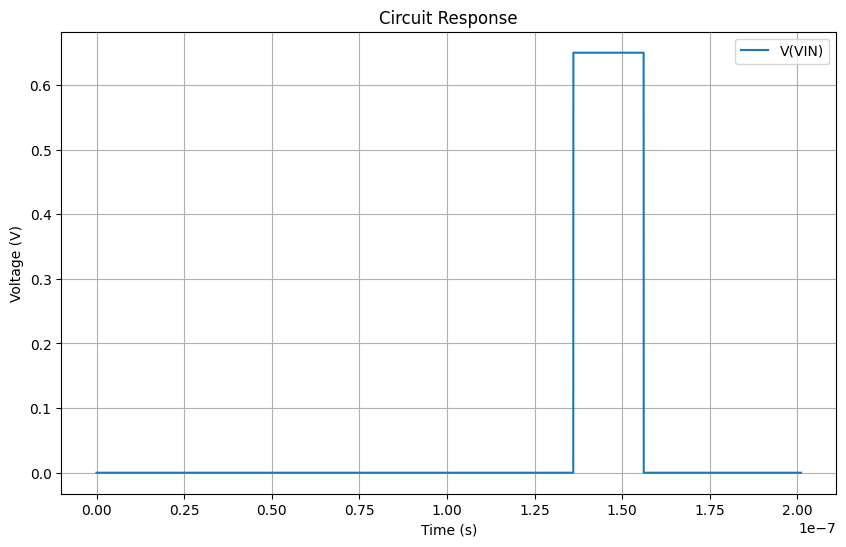

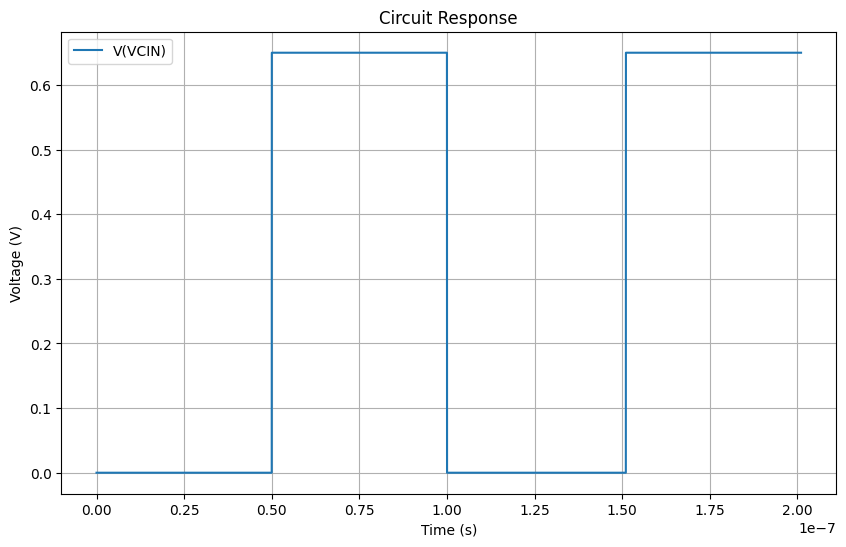

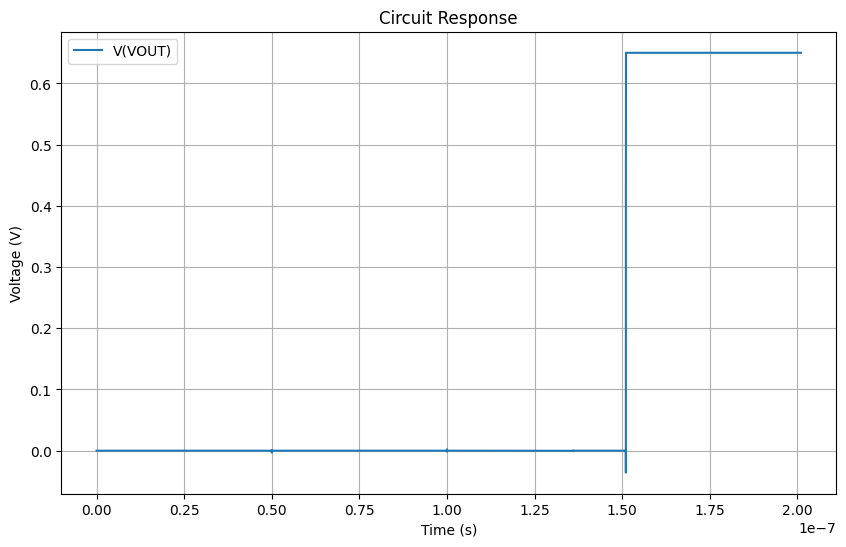

In [24]:
import matplotlib.pyplot as plt

# Load data from the Xyce output file
data = []

with open("work/vt_0.65_25.0_c2q1_DFFHQx1_D01_CLK0101_Q01_su_j0_0.000136_0.0028_setup3.0000_hold1.0164.sp.prn", "r") as f:
    # Skip the header line
    header = f.readline()
    
    # Read the rest of the lines as data
    for line in f:
        # Split line into elements and convert to floats
        elements = line.split()
        try:
            # Convert all elements to float except the first column which is index
            data.append([float(el) for el in elements[1:]])
        except ValueError:
            continue  # Skip any line that can't be converted

# Transpose the data to plot
data = list(zip(*data))

# Plot the waveform
plt.figure(figsize=(10,6))
plt.plot(data[0], data[1], label='V(VIN)')
plt.title("Circuit Response")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(data[0], data[3], label='V(VCIN)')
plt.title("Circuit Response")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(data[0], data[2], label='V(VOUT)')
plt.title("Circuit Response")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.show()


